In [4]:
import warnings 
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore


In [5]:
df=pd.read_csv("health care diabetes.csv")

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# WEEK 1

### 1) Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]=df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.nan)

In [9]:
df.count()

Pregnancies                 768
Glucose                     763
BloodPressure               733
SkinThickness               541
Insulin                     394
BMI                         757
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [10]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### 2) Visually explore these variables using histograms. Treat the missing values accordingly.



Histogram for column   :Pregnancies


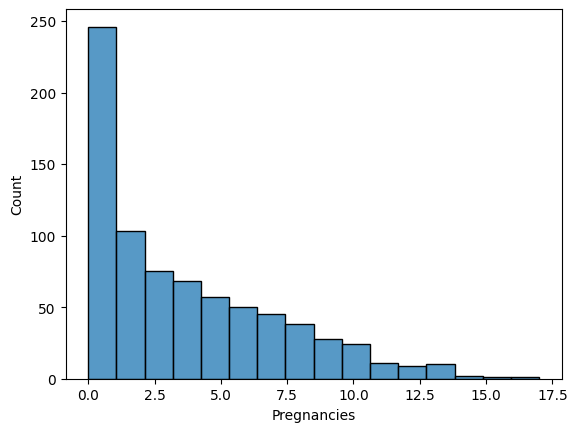

Histogram for column   :Glucose


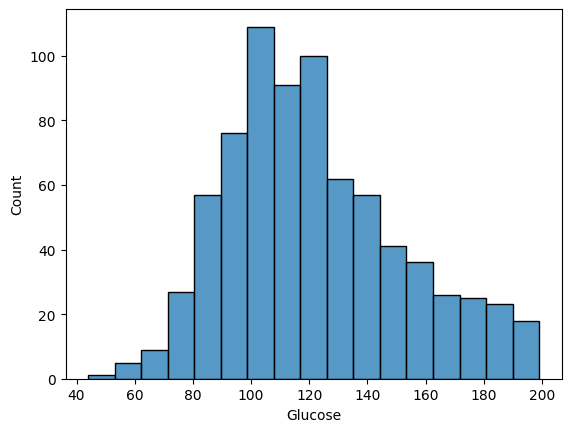

Histogram for column   :BloodPressure


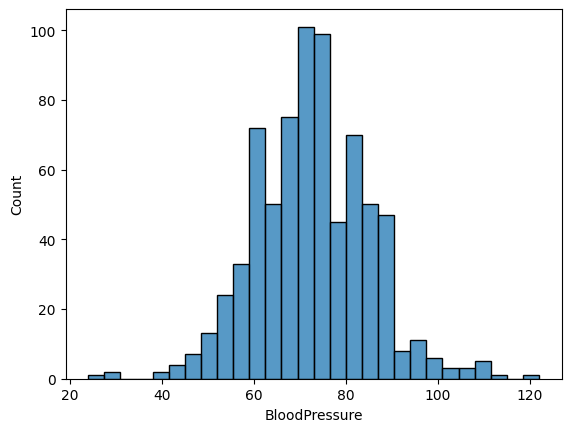

Histogram for column   :SkinThickness


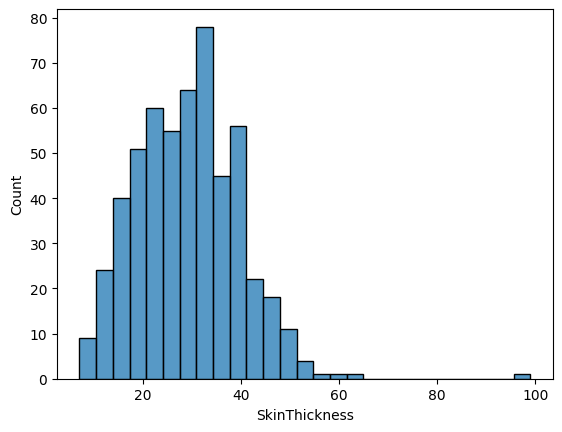

Histogram for column   :Insulin


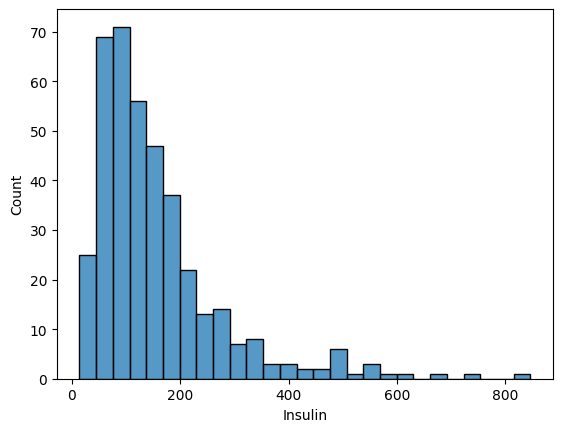

Histogram for column   :BMI


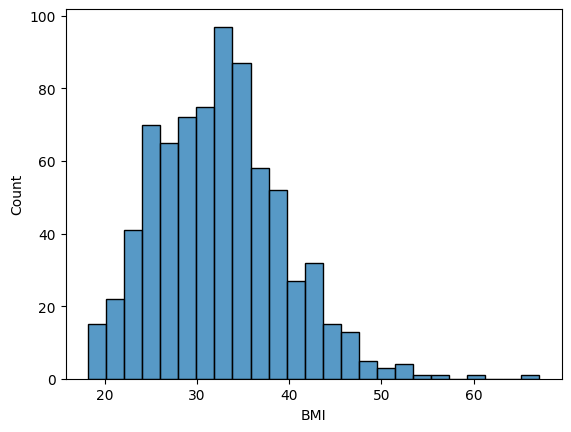

Histogram for column   :DiabetesPedigreeFunction


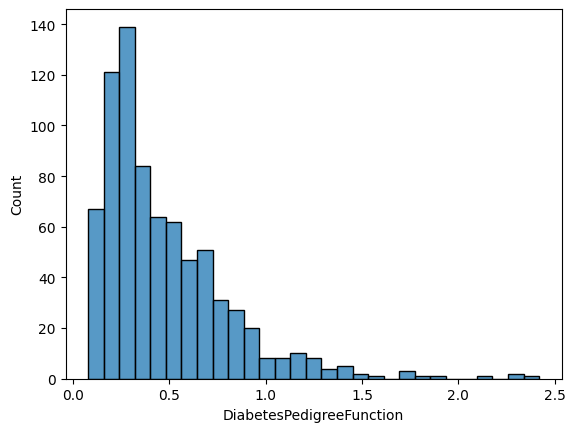

Histogram for column   :Age


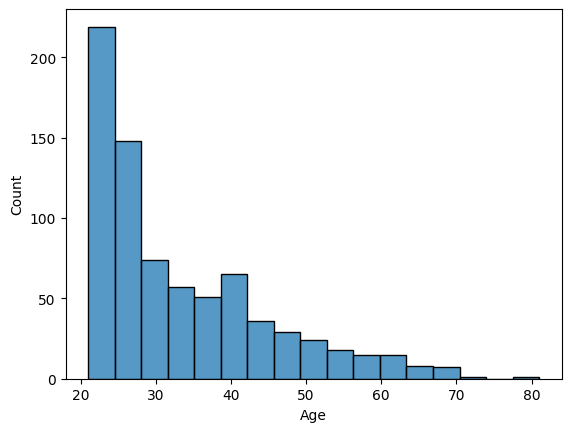

Histogram for column   :Outcome


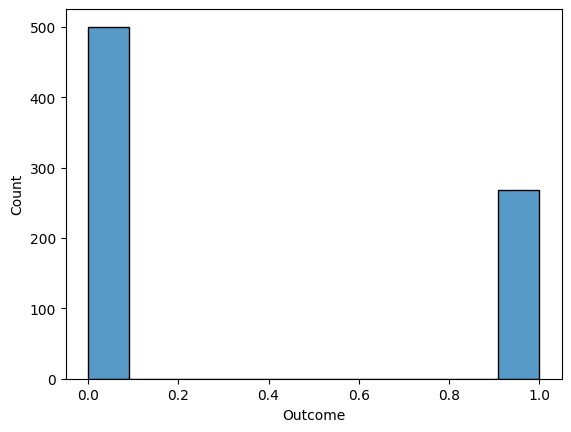

In [11]:
for i in df.columns:
    sns.histplot(df[i])
    print(f"Histogram for column   :{i}")
    plt.show()
    

#### treating the missing value

In [12]:
df["BloodPressure"].fillna(df["BloodPressure"].median(),inplace=True)
df["BMI"].fillna(df["BMI"].mean(),inplace=True)
df["Glucose"].fillna(df["Glucose"].mean(),inplace=True)

In [13]:
df["SkinThickness"].fillna(df["SkinThickness"].median(),inplace=True)
df["Insulin"].fillna(df["Insulin"].median(),inplace=True)

In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 3) There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

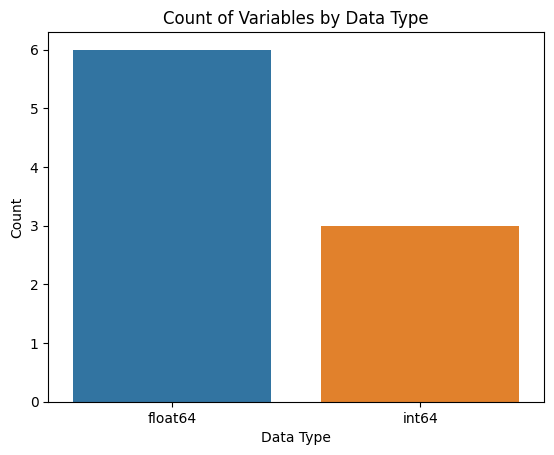

In [16]:
counts = df.dtypes.value_counts()

# plot the count of variables by data type
sns.barplot(counts.index.astype(str), counts.values)
plt.title("Count of Variables by Data Type")
plt.xlabel("Data Type")
plt.ylabel("Count")
plt.show()

In [17]:
counts

float64    6
int64      3
dtype: int64

### 4) Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

In [18]:
outcome_descrip=df["Outcome"].value_counts()

In [19]:
outcome_descrip

0    500
1    268
Name: Outcome, dtype: int64

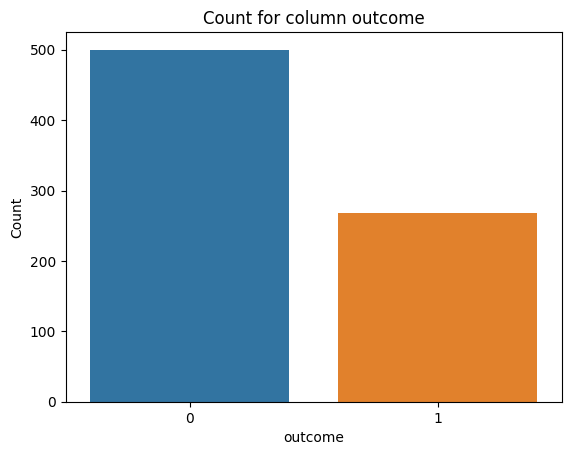

In [20]:
sns.barplot(outcome_descrip.index.astype(str),outcome_descrip.values)
plt.title("Count for column outcome")
plt.xlabel("outcome")
plt.ylabel("Count")
plt.show()

### 5) Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

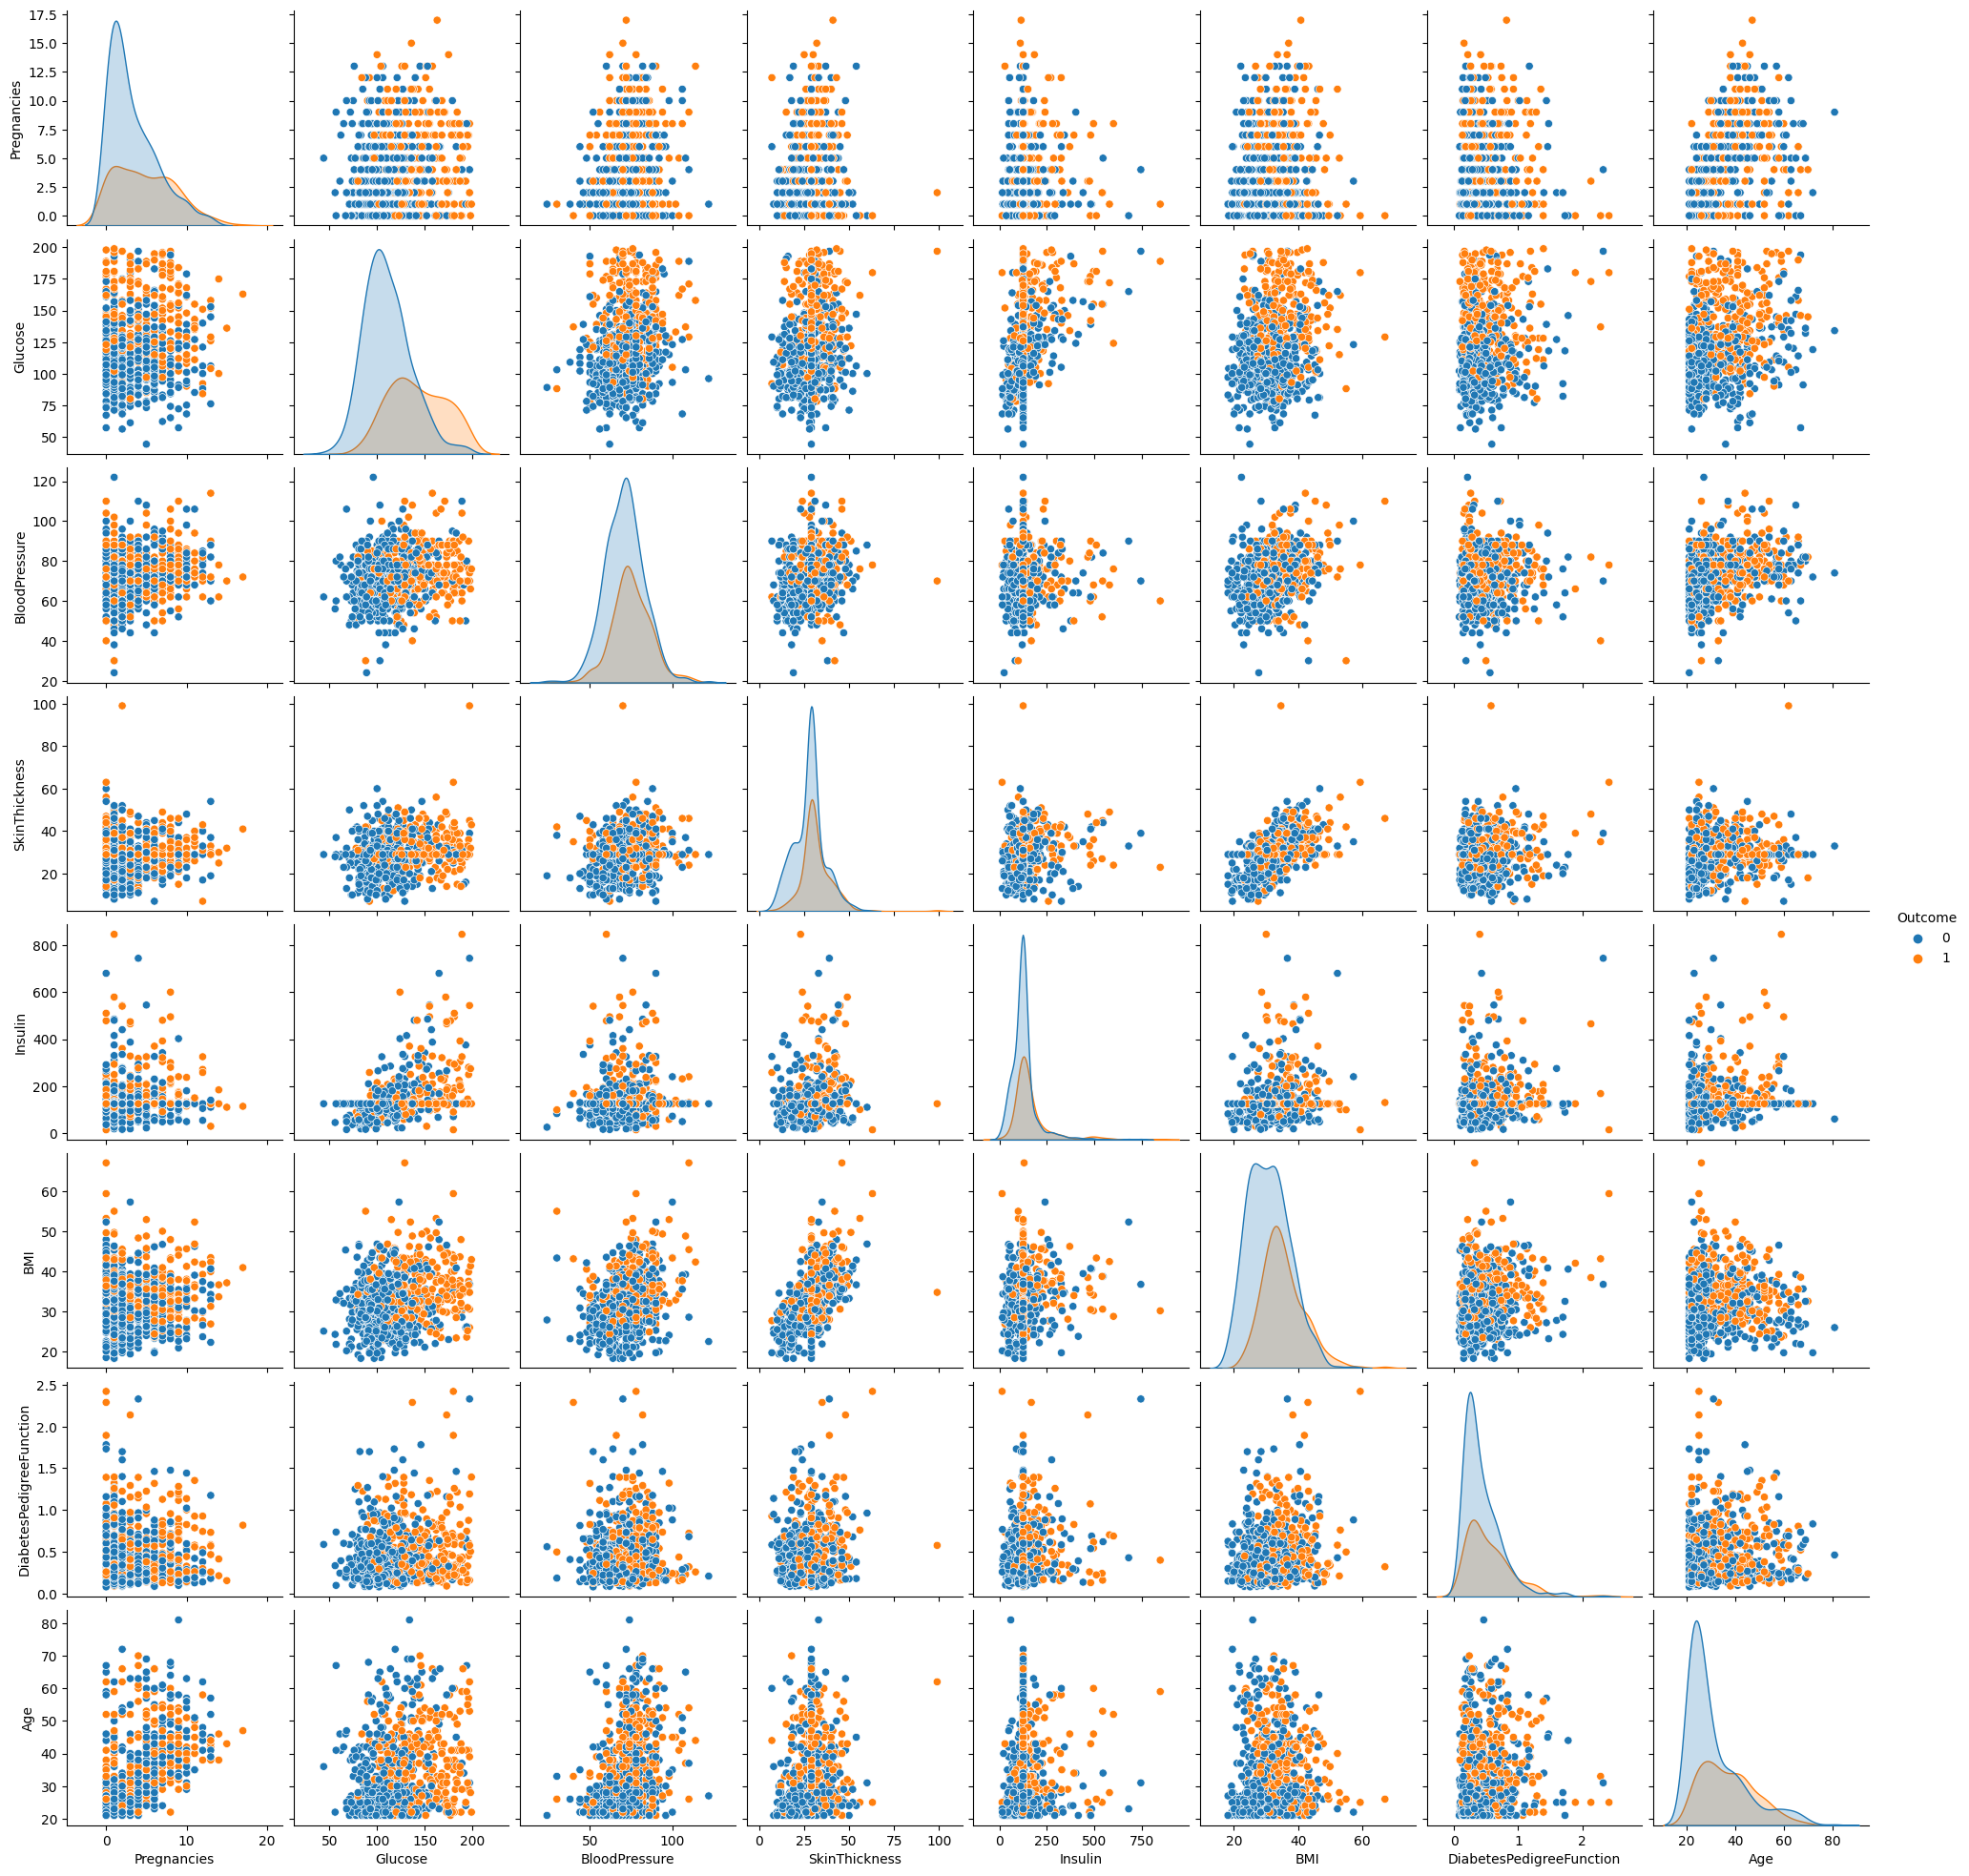

In [21]:
sns.pairplot(df,hue="Outcome")

#### by this scatter plot and heatmap we can see that the higest correlated variable is glucose is the person might get Diabeties

### 6)Perform correlation analysis. Visually explore it using a heat map.

In [22]:
df.corr()*100

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,100.000000,12.791147,20.861541,8.176982,2.504748,2.156505,-3.352267,54.434123,22.189815
Glucose,12.791147,100.000000,21.855677,19.268586,41.906354,23.094124,13.705971,26.653352,49.292767
BloodPressure,20.861541,21.855677,100.000000,19.189239,4.536330,28.131869,-0.237834,32.491539,16.572291
SkinThickness,8.176982,19.268586,19.189239,100.000000,15.561028,54.316229,10.218827,12.610719,21.487322
Insulin,2.504748,41.906354,4.536330,15.561028,100.000000,18.016977,12.650309,9.710125,20.379034
BMI,2.156505,23.094124,28.131869,54.316229,18.016977,100.000000,15.339997,2.551918,31.192439
DiabetesPedigreeFunction,-3.352267,13.705971,-0.237834,10.218827,12.650309,15.339997,100.000000,3.356131,17.384407
Age,54.434123,26.653352,32.491539,12.610719,9.710125,2.551918,3.356131,100.000000,23.835598
Outcome,22.189815,49.292767,16.572291,21.487322,20.379034,31.192439,17.384407,23.835598,100.000000


<Axes: >

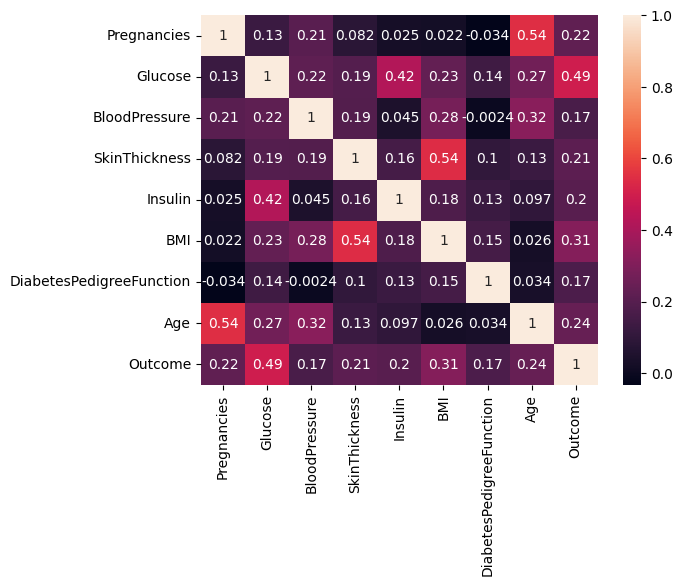

In [23]:
sns.heatmap(df.corr(),annot=True)

# WEEK 2

### 1) Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. 

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [41]:
X=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [42]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.3,random_state=1)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 8)
(300, 8)
(700,)
(300,)


In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
models=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC()]

### 2)Apply an appropriate classification algorithm to build a model.

In [53]:
for model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    print(Fore.BLUE,f"for model {model} accuracy is {accuracy}")
    print(Fore.GREEN,f"for model {model} precision is {precision}")
    print(Fore.YELLOW,f"for model {model} recall is {recall}")
    print(Fore.RED,f"for model {model} and f1 score is {f1}")
    

 for model LogisticRegression() accuracy is 0.6733333333333333
 for model LogisticRegression() precision is 0.6410256410256411
 for model LogisticRegression() recall is 0.704225352112676
 for model LogisticRegression() and f1 score is 0.6711409395973156
 for model DecisionTreeClassifier() accuracy is 0.72
 for model DecisionTreeClassifier() precision is 0.7013888888888888
 for model DecisionTreeClassifier() recall is 0.7112676056338029
 for model DecisionTreeClassifier() and f1 score is 0.7062937062937062
 for model RandomForestClassifier() accuracy is 0.8133333333333334
 for model RandomForestClassifier() precision is 0.7654320987654321
 for model RandomForestClassifier() recall is 0.8732394366197183
 for model RandomForestClassifier() and f1 score is 0.8157894736842104
 for model SVC() accuracy is 0.7233333333333334
 for model SVC() precision is 0.6685714285714286
 for model SVC() recall is 0.823943661971831
 for model SVC() and f1 score is 0.7381703470031545


### best suitable model for me is Random forrest classifier as with Smote it has 80% of accuracy higher than other algorithms

### 3) Compare various models with the results from KNN algorithm.

In [54]:
knn=KNeighborsClassifier()
knn_model= knn.fit(X_train,y_train)
y_pred_knn=knn_model.predict(X_test)

In [55]:
    accuracy_knn=accuracy_score(y_test,y_pred)
    precision_knn=precision_score(y_test,y_pred)
    recall_knn=recall_score(y_test,y_pred)
    f1_knn=f1_score(y_test,y_pred)
    print(Fore.BLUE,f"for KNN accuracy is {accuracy_knn}")
    print(Fore.GREEN,f"for KNN precision is {precision_knn}")
    print(Fore.YELLOW,f"for KNN recall is {recall_knn}")
    print(Fore.RED,f"for KNN and f1 score is {f1_knn}")

 for KNN accuracy is 0.7233333333333334
 for KNN precision is 0.6685714285714286
 for KNN recall is 0.823943661971831
 for KNN and f1 score is 0.7381703470031545


#### with respect to other model is 

In [56]:
for model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    print(Fore.BLUE,f"for model {model} accuracy is {accuracy}")
    print(Fore.GREEN,f"for model {model} precision is {precision}")
    print(Fore.YELLOW,f"for model {model} recall is {recall}")
    print(Fore.RED,f"for model {model} and f1 score is {f1}")
    

 for model LogisticRegression() accuracy is 0.6733333333333333
 for model LogisticRegression() precision is 0.6410256410256411
 for model LogisticRegression() recall is 0.704225352112676
 for model LogisticRegression() and f1 score is 0.6711409395973156
 for model DecisionTreeClassifier() accuracy is 0.7133333333333334
 for model DecisionTreeClassifier() precision is 0.6917808219178082
 for model DecisionTreeClassifier() recall is 0.7112676056338029
 for model DecisionTreeClassifier() and f1 score is 0.7013888888888888
 for model RandomForestClassifier() accuracy is 0.8133333333333334
 for model RandomForestClassifier() precision is 0.7621951219512195
 for model RandomForestClassifier() recall is 0.8802816901408451
 for model RandomForestClassifier() and f1 score is 0.8169934640522877
 for model SVC() accuracy is 0.7233333333333334
 for model SVC() precision is 0.6685714285714286
 for model SVC() recall is 0.823943661971831
 for model SVC() and f1 score is 0.7381703470031545


### 4 ) Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc.

In [67]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


#### here im using random forrest classifier as it has higher leve of accuracy

In [68]:
rf=RandomForestClassifier()
rf_model=rf.fit(X_train,y_train)

In [69]:
rf_predict=rf_model.predict(X_train)

In [70]:
fpr, tpr, thresholds = roc_curve(y_train, rf_predict)
roc_auc = auc(fpr, tpr)

 this is for train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       342
           1       1.00      1.00      1.00       358

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



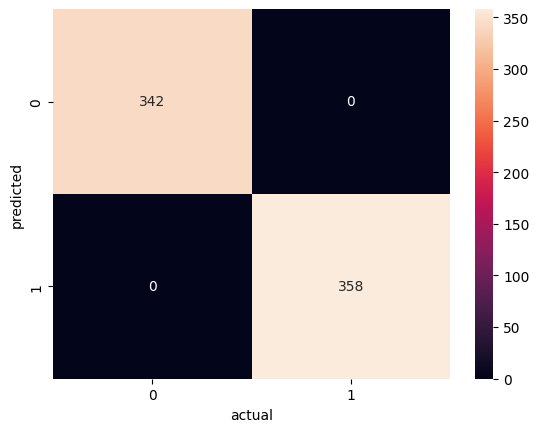

In [77]:
sns.heatmap(confusion_matrix(y_train,rf_predict),annot=True,fmt="d")
plt.xlabel("actual")
plt.ylabel("predicted")
report = classification_report(y_train, rf_predict)

print(Fore.RED,"this is for train data")
print(report)

In [78]:
TP=342
TN=358
FP=0
FN=0
Sensitivity_train = TP / (TP + FN)
Specificity_train = TN / (TN + FP)

In [80]:
print("\nSensitivity: {:.2f}".format(Sensitivity_train))
print("Specificity: {:.2f}".format(Specificity_train))
print("AUC: {:.2f}".format(roc_auc))
print("\nClassification Report:")
print(report)
print(Fore.GREEN,"For train data")


Sensitivity: 1.00
Specificity: 1.00
AUC: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       342
           1       1.00      1.00      1.00       358

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

 For train data


In [64]:
rf_predict_t=rf_model.predict(X_test)


In [82]:
fpr1, tpr1, thresholds = roc_curve(y_test, rf_predict_t)
roc_auc1 = auc(fpr1, tpr1)

 this is for test data
              precision    recall  f1-score   support

           0       0.89      0.75      0.81       158
           1       0.76      0.90      0.83       142

    accuracy                           0.82       300
   macro avg       0.83      0.82      0.82       300
weighted avg       0.83      0.82      0.82       300



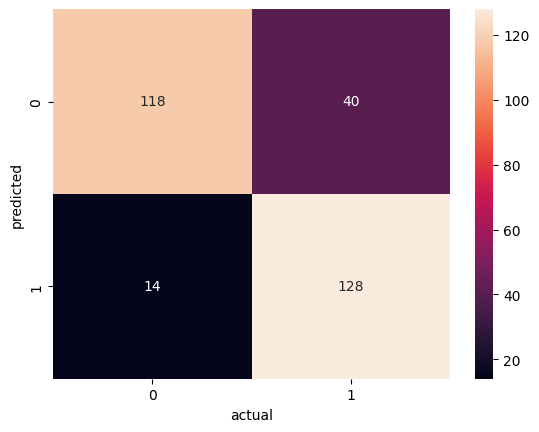

In [86]:
sns.heatmap(confusion_matrix(y_test,rf_predict_t),annot=True,fmt="d")
plt.xlabel("actual")
plt.ylabel("predicted")
report1 = classification_report(y_test, rf_predict_t)

print(Fore.BLUE,"this is for test data")
print(report)

In [85]:
TP1=118
TN1=128
FP1=40
FN1=14
Sensitivity_test = TP1 / (TP1 + FN1)
Specificity_test = TN1 / (TN1 + FP1)

In [87]:
print("\nSensitivity: {:.2f}".format(Sensitivity_test))
print("Specificity: {:.2f}".format(Specificity_test))
print("AUC: {:.2f}".format(roc_auc1))
print("\nClassification Report:")
print(report1)
print(Fore.GREEN,"For test data")


Sensitivity: 0.89
Specificity: 0.76
AUC: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81       158
           1       0.76      0.90      0.83       142

    accuracy                           0.82       300
   macro avg       0.83      0.82      0.82       300
weighted avg       0.83      0.82      0.82       300

 For test data


#### as this implies that the model is predicting perfect on train but very less perfect on test data 

In [107]:
df.to_csv('health care diabetes eda.csv', index=False)